Author: Nick Wagner

Date: 2019-05-07

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from adjustText import adjust_text
from pymatgen.core.periodic_table import Element
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
font = {'size'   : 22}
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('font', **font)

## Load elemental resistivity and molar refractivity values

In [2]:
res = pd.read_excel("../../data/hammerfeld_criterion/Elemental_conductivities.xlsx")
ref = pd.read_csv("../../data/hammerfeld_criterion/molar_refractivities.csv")

## Convert conductivity units to (ohm*cm)<sup>-1</sup>

In [3]:
# res['electrical_conductivity'] = res['Electrical Conductivity Ang'] * 10**6
res['electrical_conductivity'] = res['Electrical Conductivity Wolfram']/100
res.head()

,Electrical Conductivity Ang,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity
0,NaN,NaN,Hydrogen,H,1,NaN,NaN,NaN,NaN
1,NaN,NaN,Helium,He,2,NaN,NaN,NaN,NaN
2,1.080000e-01,10^6/cm,Lithium,Li,3,1.100000e+07,1/m Ω,NaN,110000.000000
3,3.130000e-01,10^6/cm Ω,Beryllium,Be,4,2.500000e+07,1/m Ω,NaN,250000.000000
4,1.000000e-12,10^6/cm Ω,Boron,B,5,1.000000e-04,1/m Ω,NaN,0.000001


In [4]:
res.loc[res['Symbol']=='P', 'electrical_conductivity'] = 1e-11
res.loc[res['Symbol']=='P']

,Electrical Conductivity Ang,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity
10,1.000000e-17,10^6/cm Ω,Phosphorus,P,15,10000000.0,1/m Ω,NaN,1.000000e-11


In [5]:
ref.head()

,Atomic number,Atom,Polarizability,PolarizabilityUnit,Estimate_accuracy(%),method,Ref,Molar Refractivity,Molar volume,MolarVolumeUnit,R/V
0,1,H,0.666793,1e-24 cm^3,“exact”,calc,MB77,1.681978,0.011210,m^3/mol,0.000150
1,2,He,0.204956,1e-24 cm^3,“exact”,calc,MB77,0.516999,0.022424,m^3/mol,0.000023
2,2,He,0.205000,1e-24 cm^3,0.1,index/diel,NB65/OC67,0.517110,0.022424,m^3/mol,0.000023
3,3,Li,24.300000,1e-24 cm^3,2,beam,MB77,61.296494,0.000013,m^3/mol,4.726021
4,4,Be,5.600000,1e-24 cm^3,2,calc,MB77,14.125941,0.000005,m^3/mol,2.896619


## Join the resistivity and refractivity tables together

In [6]:
df = ref.merge(res, how='left', right_on='Symbol', left_on='Atom')
df.head()

,Atomic number,Atom,Polarizability,PolarizabilityUnit,Estimate_accuracy(%),method,Ref,Molar Refractivity,Molar volume,MolarVolumeUnit,R/V,Electrical Conductivity Ang,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity
0,1,H,0.666793,1e-24 cm^3,“exact”,calc,MB77,1.681978,0.011210,m^3/mol,0.000150,NaN,NaN,Hydrogen,H,1.0,NaN,NaN,NaN,NaN
1,2,He,0.204956,1e-24 cm^3,“exact”,calc,MB77,0.516999,0.022424,m^3/mol,0.000023,NaN,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN
2,2,He,0.205000,1e-24 cm^3,0.1,index/diel,NB65/OC67,0.517110,0.022424,m^3/mol,0.000023,NaN,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN
3,3,Li,24.300000,1e-24 cm^3,2,beam,MB77,61.296494,0.000013,m^3/mol,4.726021,0.108,10^6/cm,Lithium,Li,3.0,11000000.0,1/m Ω,NaN,110000.0
4,4,Be,5.600000,1e-24 cm^3,2,calc,MB77,14.125941,0.000005,m^3/mol,2.896619,0.313,10^6/cm Ω,Beryllium,Be,4.0,25000000.0,1/m Ω,NaN,250000.0


## Add element group numbers

In [7]:
def get_groups(name):
    """Find group numbers of the elements"""
    elems = ['Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb',
                  'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
                  'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk']
    if name in elems:
        g = 3 # Lanthanides are put into group 3
    else:
        g = Element(name).group
    return g

In [8]:
df['Group'] = df['Atom'].apply(get_groups)

df.head()

,Atomic number,Atom,Polarizability,PolarizabilityUnit,Estimate_accuracy(%),method,Ref,Molar Refractivity,Molar volume,MolarVolumeUnit,...,Electrical Conductivity Ang,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity,Group
0,1,H,0.666793,1e-24 cm^3,“exact”,calc,MB77,1.681978,0.011210,m^3/mol,...,NaN,NaN,Hydrogen,H,1.0,NaN,NaN,NaN,NaN,1
1,2,He,0.204956,1e-24 cm^3,“exact”,calc,MB77,0.516999,0.022424,m^3/mol,...,NaN,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN,18
2,2,He,0.205000,1e-24 cm^3,0.1,index/diel,NB65/OC67,0.517110,0.022424,m^3/mol,...,NaN,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN,18
3,3,Li,24.300000,1e-24 cm^3,2,beam,MB77,61.296494,0.000013,m^3/mol,...,0.108,10^6/cm,Lithium,Li,3.0,11000000.0,1/m Ω,NaN,110000.0,1
4,4,Be,5.600000,1e-24 cm^3,2,calc,MB77,14.125941,0.000005,m^3/mol,...,0.313,10^6/cm Ω,Beryllium,Be,4.0,25000000.0,1/m Ω,NaN,250000.0,2


In [9]:
df.loc[df['Atom']=='Hg']

,Atomic number,Atom,Polarizability,PolarizabilityUnit,Estimate_accuracy(%),method,Ref,Molar Refractivity,Molar volume,MolarVolumeUnit,...,Electrical Conductivity Ang,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity,Group
92,80,Hg,5.02,1e-24 cm^3,1,index,GH96,12.662897,0.000015,m^3/mol,...,0.0104,10^6/cm Ω,Mercury,Hg,80.0,1000000.0,1/m Ω,NaN,10000.0,12
93,80,Hg,5.70,1e-24 cm^3,25,calc,D84,14.378190,0.000015,m^3/mol,...,0.0104,10^6/cm Ω,Mercury,Hg,80.0,1000000.0,1/m Ω,NaN,10000.0,12


## Define classes for plotting purposes

In [10]:
def get_class(name):
    """Identify whether element is metal, metalloid, or non-metal."""
    metalloids = ['B', 'Si', 'Ge', 'As', 'Sb', 'Te', 'Po', 'At']
    extra_metals = [13, 31, 49, 81, 50, 82, 83]
    group = df[df['Atom'] == name]['Group'].iloc[0]
    if name in metalloids:
        class_name = 'Metalloid'
    elif group <= 12 or df[df['Atom'] == name]['Atomic number'].iloc[0] in extra_metals:
        class_name = 'Metal'
    else:
        class_name = 'Non-metal'
    return class_name

In [11]:
df['Class'] = df['Atom'].apply(get_class)
df.head()

,Atomic number,Atom,Polarizability,PolarizabilityUnit,Estimate_accuracy(%),method,Ref,Molar Refractivity,Molar volume,MolarVolumeUnit,...,conductivity_unit1,Name,Symbol,#,Electrical Conductivity Wolfram,conductivity_unit2,Note,electrical_conductivity,Group,Class
0,1,H,0.666793,1e-24 cm^3,“exact”,calc,MB77,1.681978,0.011210,m^3/mol,...,NaN,Hydrogen,H,1.0,NaN,NaN,NaN,NaN,1,Metal
1,2,He,0.204956,1e-24 cm^3,“exact”,calc,MB77,0.516999,0.022424,m^3/mol,...,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN,18,Non-metal
2,2,He,0.205000,1e-24 cm^3,0.1,index/diel,NB65/OC67,0.517110,0.022424,m^3/mol,...,NaN,Helium,He,2.0,NaN,NaN,NaN,NaN,18,Non-metal
3,3,Li,24.300000,1e-24 cm^3,2,beam,MB77,61.296494,0.000013,m^3/mol,...,10^6/cm,Lithium,Li,3.0,11000000.0,1/m Ω,NaN,110000.0,1,Metal
4,4,Be,5.600000,1e-24 cm^3,2,calc,MB77,14.125941,0.000005,m^3/mol,...,10^6/cm Ω,Beryllium,Be,4.0,25000000.0,1/m Ω,NaN,250000.0,2,Metal


## Show resistivity vs. R/V

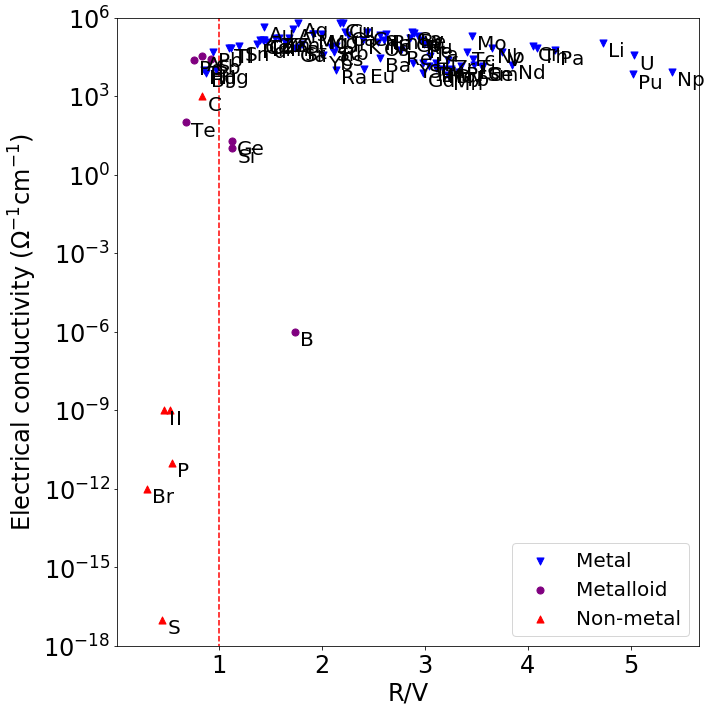

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df[df['Class'] == 'Metal']['R/V'], 
           df[df['Class'] == 'Metal']['electrical_conductivity'], 
           s=50, marker='v', 
           c='blue',
           label='Metal')
ax.scatter(df[df['Class'] == 'Metalloid']['R/V'], 
           df[df['Class'] == 'Metalloid']['electrical_conductivity'], 
           s=50, 
           marker='o', 
           c='purple',
           label='Metalloid')
ax.scatter(df[df['Class'] == 'Non-metal']['R/V'], 
           df[df['Class'] == 'Non-metal']['electrical_conductivity'], 
           s=50, 
           marker='^', 
           c='red',
           label='Non-metal')
# ax.scatter(df['R/V'], df['electrical_conductivity'], s=50)
ax.set_xlabel('R/V', fontsize=24)
ax.set_ylabel(r'Electrical conductivity ($\Omega^{-1}$cm$^{-1}$)', fontsize=24)
ax.set_yscale('log')
ax.set_ybound(lower=1e-18, upper=1e6)
labels = df['Atom']
for i in range(len(df['electrical_conductivity'])):
    if math.isnan(df['electrical_conductivity'].iloc[i]) or math.isnan(df['R/V'].iloc[i]):
        continue
    ax.annotate(labels.iloc[i], 
                (df['R/V'].iloc[i]+0.05,
                 df['electrical_conductivity'].iloc[i]-0.7*df['electrical_conductivity'].iloc[i]),
               fontsize=20)
#     if labels.iloc[i] == 'P':
#         print(labels.iloc[i])
line = plt.Line2D([1, 1], [0, 1e8], color='red', ls='dashed')
ax.add_line(line)
ax.legend()
plt.tight_layout()
plt.savefig("../../plots/goldhammer_herzfeld_elements/conductivity_RV.pdf", dpi=200, bbox_inches='tight')
plt.show()

## Plot R/V vs. Group

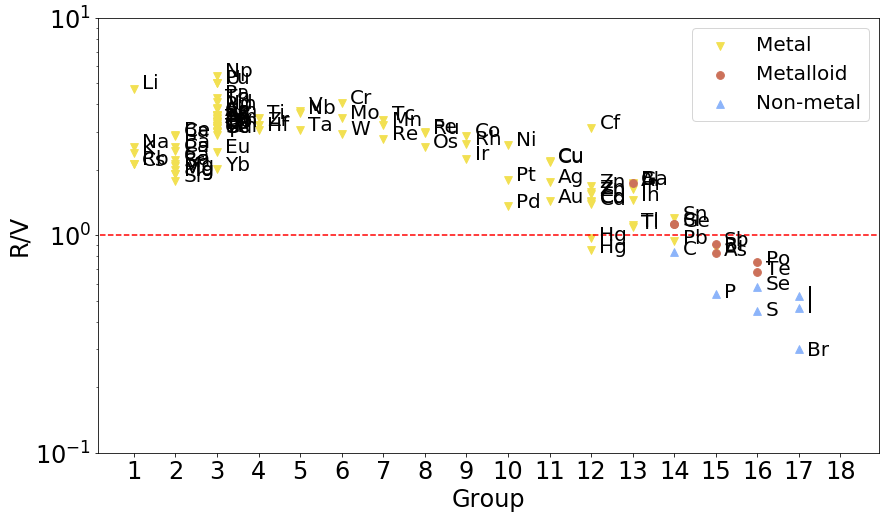

In [66]:
fig, ax = plt.subplots(figsize=(14,8))
# scat = ax.scatter(df['Group'], df['R/V'], s=60)
ax.scatter(df[df['Class'] == 'Metal']['Group'], 
           df[df['Class'] == 'Metal']['R/V'], 
           s=60, marker='v', 
           c='#f2e052',
           label='Metal')
ax.scatter(df[df['Class'] == 'Metalloid']['Group'], 
           df[df['Class'] == 'Metalloid']['R/V'], 
           s=60, 
           marker='o', 
           c='#cc715a',
           label='Metalloid')
ax.scatter(df[df['Class'] == 'Non-metal']['Group'], 
           df[df['Class'] == 'Non-metal']['R/V'], 
           s=60, 
           marker='^', 
           c='#8cb4fa',
           label='Non-metal')
ax.set_xlabel('Group', fontsize=24)
ax.set_ylabel('R/V', fontsize=24)
ax.set_yscale('log')
ax.set_xticks(range(1, 19))
ax.set_ybound(lower=.1, upper=10)
texts = []
labels = df['Atom']
for i, txt in enumerate(df['R/V']):
    if math.isnan(txt):
        continue
#     if labels.iloc[i] in ['Ga', 'Bi', 'Sb', 'In', 'Al', 'As', 
#                           'Tl', 'B', 'Sn', 'Ge', 'Pb', 'Si', 'P']:
#         texts.append(plt.text(df['Group'].iloc[i]+0.2, 
#                               df['R/V'].iloc[i]-0.02,
#                               labels.iloc[i],
#                             clip_on=True,
#                             fontsize=20))
#     else:
    ax.annotate(labels.iloc[i], 
            (df['Group'].iloc[i]+0.2, df['R/V'].iloc[i]-0.02),
           fontsize=20, clip_on=True)

line = plt.Line2D([0, 19], [1, 1], color='red', ls='dashed')
ax.add_line(line)
ax.legend()
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), lim=500, 
            only_move={'text': 'y'})
plt.savefig("../../plots/goldhammer_herzfeld_elements/RV_groups.pdf", dpi=200, bbox_inches='tight')
plt.show()

## Plot Electrical conductivity vs. Group

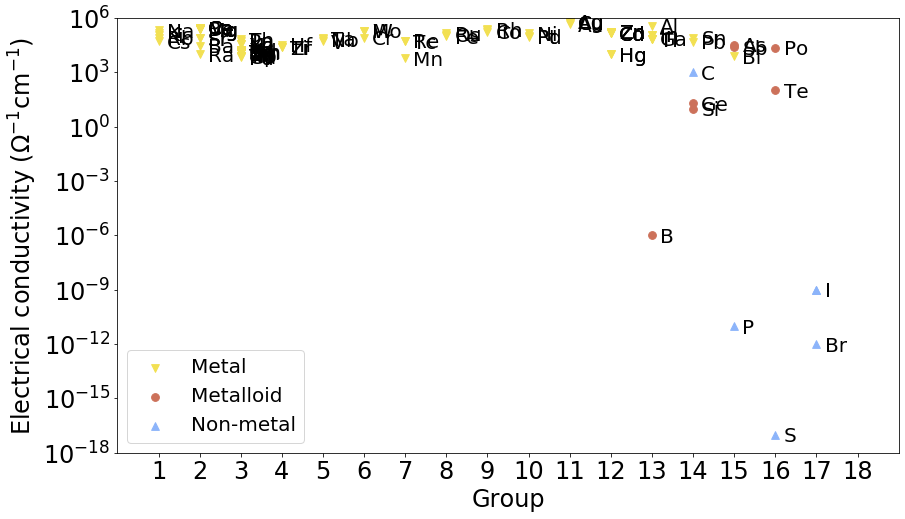

In [53]:
fig, ax = plt.subplots(figsize=(14,8))
# scat = ax.scatter(df['Group'], df['electrical_conductivity'], s=60)
ax.scatter(df[df['Class'] == 'Metal']['Group'], 
           df[df['Class'] == 'Metal']['electrical_conductivity'], 
           s=60, marker='v', 
           c='#f2e052',
           label='Metal')
ax.scatter(df[df['Class'] == 'Metalloid']['Group'], 
           df[df['Class'] == 'Metalloid']['electrical_conductivity'], 
           s=60, 
           marker='o', 
           c='#cc715a',
           label='Metalloid')
ax.scatter(df[df['Class'] == 'Non-metal']['Group'], 
           df[df['Class'] == 'Non-metal']['electrical_conductivity'], 
           s=60, 
           marker='^', 
           c='#8cb4fa',
           label='Non-metal')
ax.set_xlabel('Group', fontsize=24)
ax.set_ylabel(r'Electrical conductivity ($\Omega^{-1}$cm$^{-1}$)', fontsize=24)
ax.set_yscale('log')

ax.set_xbound(lower=0, upper=19)
ax.set_xticks(range(1, 19))
ax.set_ybound(lower=1e-18, upper=1e6)

texts=[]
labels = df['Atom']
for i, txt in enumerate(df['Electrical Conductivity Wolfram']):
    if math.isnan(txt):
        continue
#     texts.append(plt.text(df['Group'].iloc[i]+0.2, 
#                       df['electrical_conductivity'].iloc[i]-0.6*df['electrical_conductivity'].iloc[i],
#                       labels.iloc[i],
#                     clip_on=True,
#                     fontsize=20))
    ax.annotate(labels.iloc[i], 
                (df['Group'].iloc[i]+0.2, 
                 df['electrical_conductivity'].iloc[i]-0.6*df['electrical_conductivity'].iloc[i]),
               fontsize=20)
ax.legend()
# adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), lim=500)
plt.savefig("../../plots/goldhammer_herzfeld_elements/conductivity_groups.pdf", dpi=200, bbox_inches='tight')